## Sales conversion optimization

Data: https://www.kaggle.com/loveall/clicks-conversion-tracking

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
df= pd.read_csv("KAG_conversion_data.csv")

df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [57]:
df.describe()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


In [59]:
#Dummy encode any categorical or object values in the data and save the resulting data frame to variable X.
X=pd.get_dummies(data=df,drop_first=True)
X

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,age_35-39,age_40-44,age_45-49,gender_M
0,708746,916,103916,15,7350,1,1.430000,2,1,0,0,0,1
1,708749,916,103917,16,17861,2,1.820000,2,0,0,0,0,1
2,708771,916,103920,20,693,0,0.000000,1,0,0,0,0,1
3,708815,916,103928,28,4259,1,1.250000,1,0,0,0,0,1
4,708818,916,103928,28,4133,1,1.290000,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,109,1129773,252,358.189997,13,2,0,0,1,0
1139,1314411,1178,179978,110,637549,120,173.880003,3,0,0,0,1,0
1140,1314412,1178,179979,111,151531,28,40.289999,2,0,0,0,1,0
1141,1314414,1178,179981,113,790253,135,198.710001,8,2,0,0,1,0


## Using a heat map to show the correlation in the data
a. Drop the first 4 columns in the data frame X.

b. Basing your answer on what can be seen in the heat map, why did we drop these columns?


In [60]:
#Drop the first 4 columns in the data frame X.
X.drop(X.iloc[:, 0:4], inplace = True, axis = 1)

In [61]:
X.head()

,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,age_35-39,age_40-44,age_45-49,gender_M
0,7350,1,1.43,2,1,0,0,0,1
1,17861,2,1.82,2,0,0,0,0,1
2,693,0,0.00,1,0,0,0,0,1
3,4259,1,1.25,1,0,0,0,0,1
4,4133,1,1.29,1,1,0,0,0,1


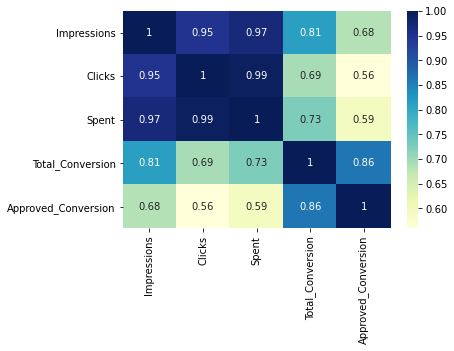

In [62]:
#Showing correlation in the data using a heatmap and commenting why we dropped the columns above
sns.heatmap(df[["Impressions","Clicks","Spent","Total_Conversion","Approved_Conversion"]].corr(),annot=True,cmap="YlGnBu");

### Using the elbow method:
a. Determine the best number of clusters for the data in the range of 2 to 20.

b. Also include the graphical plot for the elbow curve.

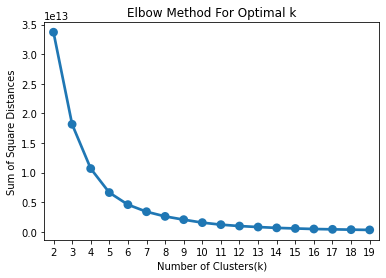

In [63]:
from sklearn.cluster import KMeans
import seaborn as sns 

sum_of_sq_dist = {}
for k in range(2,20):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [64]:
# Based on the result above in 4b use the value at your elbow point to cluster the values in the data frame X.
KMean_clust = KMeans(n_clusters= 4, init= 'k-means++', max_iter= 1000)
KMean_clust.fit(X)

KMeans(max_iter=1000, n_clusters=4)

In [68]:
#visualizing the clusters
sns.set(style ='darkgrid')

plt.scatter(X[KMean_clust==2,2], X[KMean_clust==2,3], s= 100, c= 'red')

KeyError: (False, 2)

### Building KMeans model with K=4 (Training and Predicting)
Use the model to predict the labels from the data and save them to variable y_means

In [37]:
# Instantiating
kmeans4 = KMeans(n_clusters = 4)

# Training the model
kmeans4.fit(X)

# predicting
y_means = kmeans4.fit_predict(X)
print(y_pred)

# Storing the y_pred values in a new column
df['Advert_Type'] = y_means+1 #to start the cluster number from 1

[0 0 0 ... 0 1 3]


In [38]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,Advert_Type
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,1
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,1
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,1
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,1


### Using any form of distribution plot of your choice and the original data frame, plot 2 graphs that can be used to answer the following:
a. Which advert type lead to the highest and consistent amount of sales by customers of all the age brackets?

b. Does the company xyz have gender bias in terms of their ad spending? Are their products gender neutral?

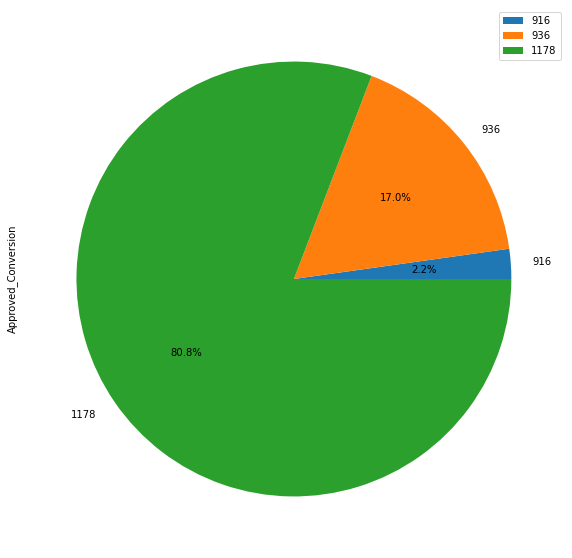

In [44]:
df.groupby(['xyz_campaign_id']).sum().plot(kind='pie', y='Approved_Conversion',figsize=(15,10), autopct='%1.1f%%');

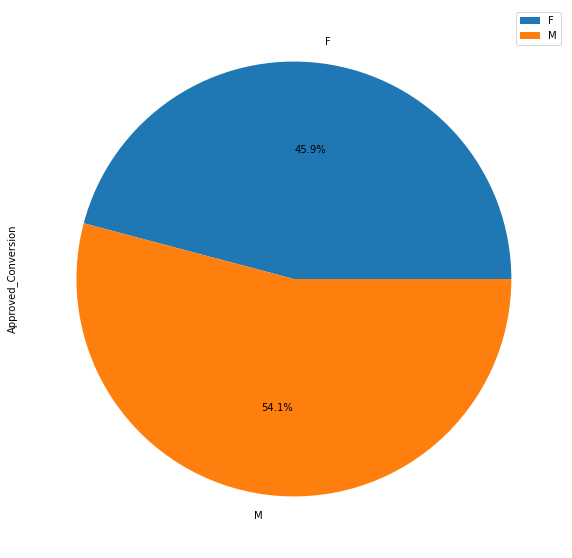

In [46]:
df.groupby(['gender']).sum().plot(kind='pie', y='Approved_Conversion',figsize=(15,10), autopct='%1.1f%%');

## Hierarchical clustering

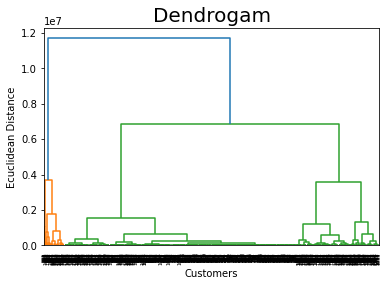

In [42]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Customers')
plt.ylabel('Ecuclidean Distance')
plt.show()